## Part 1. General Structure

In [78]:
import pandas as pd
from pathlib import Path
import numpy as np

dir = Path.cwd().parent / "cleaned_data_combined_modified.csv"
print(dir)
df = pd.read_csv(dir)

df.head()


E:\CSC311\ML_Project\cleaned_data_combined_modified.csv


,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6,"Week day lunch,At a party,Late night snack",5,Cloudy with a Chance of Meatballs,Coke,Friends,A little (mild),Pizza
1,715742,4,"bread, meet","Week day lunch,At a party,Late night snack",5$ for a large piece,All sort of american young boy movies,Coke,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10dollar,action movie,cola,Friends,A moderate amount (medium),Pizza
3,606874,4,6-7,"Week day lunch,Week day dinner,Weekend lunch,W...",$3,Mamma Mia,Soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3 or more,"Week day lunch,Week day dinner,Weekend lunch,W...",$5,Cloudy with a chance of meatballs,Soda,"Siblings,Friends",A little (mild),Pizza


In [13]:
# Shape and general info
print(df.shape)
df.info()

# Statistical summary for numerical features
df.describe()


(1644, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 10 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   id                                                                                                                     1644 non-null   int64 
 1   Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)  1644 non-null   int64 
 2   Q2: How many ingredients would you expect this food item to contain?                                                   1644 non-null   object
 3   Q3: In what setting would you expect this food to be served? Please check all that apply                               1644 non-null   object


,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"
count,1644.000000,1644.000000
mean,581970.958029,3.174574
std,125479.145414,1.021050
min,5978.000000,1.000000
25%,524483.750000,2.000000
50%,617502.000000,3.000000
75%,631686.250000,4.000000
max,854745.000000,5.000000


In [15]:
label_counts = df['Label'].value_counts()
print(label_counts)


Label
Pizza       548
Shawarma    548
Sushi       548
Name: count, dtype: int64


## Part 2.Numerical Features

Complexity rating

In [87]:
import matplotlib.pyplot as plt
def plot_numerical_feature_vs_label(df, feature_key, feature_name):
    fig, ax = plt.subplots(figsize=(12, 6))
    feature = feature_key
    labels = df['Label'].unique()
    feature_by_label = [df[df['Label'] == label][feature].dropna() for label in labels]

    # Plotting boxplots
    ax.boxplot(feature_by_label, labels=labels)

    # Formatting plot
    ax.set_title("{} for Each Food".format(feature_name))
    ax.set_xlabel('Food Item Label')
    ax.set_ylabel(feature_name)
    plt.grid(axis='y')


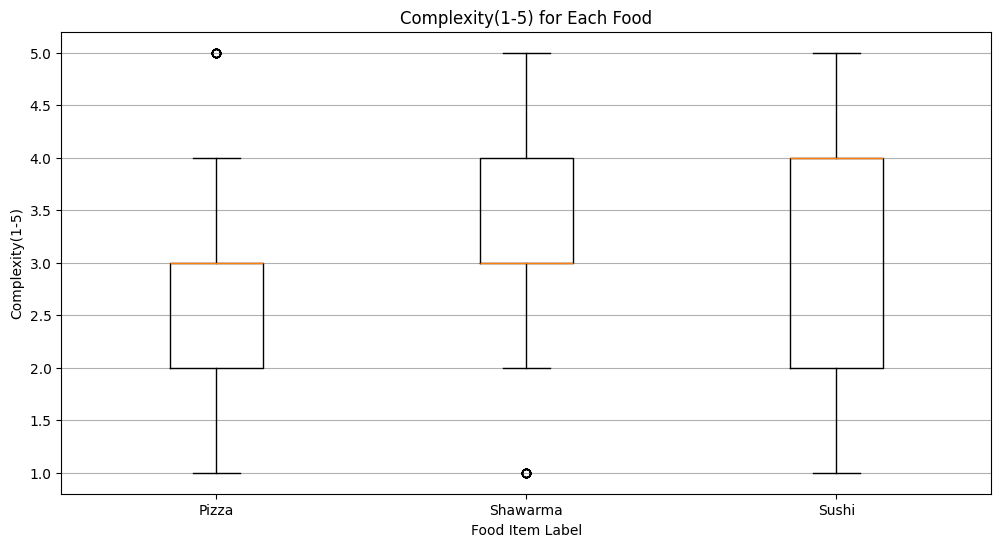

In [56]:
plot_numerical_feature_vs_label(df, "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)", "Complexity(1-5)")
# Display plot
plt.show()


Number of Ingredients

First extraction

In [41]:
import re
import pandas as pd

# Function to preprocess ingredient count responses based on numerical occurrences and string parsing
def parse_number_extraction(response):
    if pd.isna(response):
        return None

    response = str(response).strip().lower()

    # Extract numbers from the response
    numbers = [float(num) for num in re.findall(r'\d+\.\d+|\d+', response)]

    if numbers:
        if len(numbers) == 1:
            return numbers[0]
        elif len(numbers) > 1:
            return sum(numbers) / len(numbers)
    else:
        # No numeric values, check for comma or hyphen-separated strings
        separators = re.findall(r'[,-]', response)
        words = re.findall(r'\w+', response)
        if len(separators) >= len(words) - 1 and len(words) > 1:
            return len(words)

    return float('nan')

# Apply this function to Q2 responses
df["ingredients_numeric"] = df["Q2: How many ingredients would you expect this food item to contain?"].apply(parse_number_extraction)

# Check how many values are successfully parsed
print(df['ingredients_numeric'].isna().sum(), "missing/invalid responses")
print(df[['Q2: How many ingredients would you expect this food item to contain?', "ingredients_numeric"]].head(15))


68 missing/invalid responses
   Q2: How many ingredients would you expect this food item to contain?  \
0                                                   6                     
1                                         bread, meet                     
2                                                   5                     
3                                                 6-7                     
4                                           3 or more                     
5                                                   6                     
6                                        about 3 or 4                     
7                                                 4-5                     
8                                                   5                     
9                                                   9                     
10                                                 10                     
11                                                  6                  

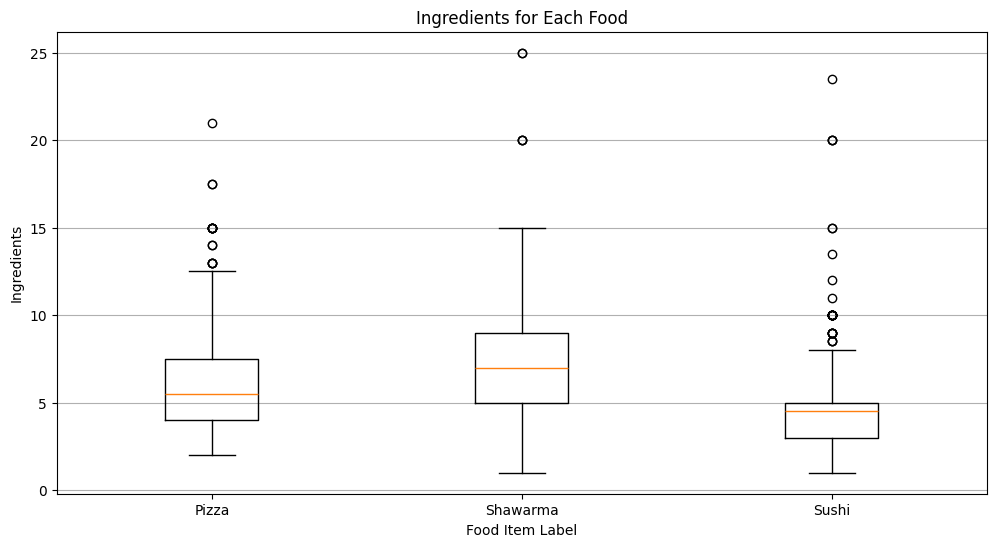

In [53]:
plot_numerical_feature_vs_label(df, "ingredients_numeric", "Ingredients")
# Display plot
plt.show()

Prices

In [43]:
df["price_numeric"] = df["Q4: How much would you expect to pay for one serving of this food item?"].apply(parse_number_extraction)
print(df['price_numeric'].isna().sum(), "missing/invalid responses")
print(df[['Q4: How much would you expect to pay for one serving of this food item?', "price_numeric"]].head(15))

10 missing/invalid responses
   Q4: How much would you expect to pay for one serving of this food item?  \
0                                                   5                        
1                                5$ for a large piece                        
2                                            10dollar                        
3                                                 $3                         
4                                                 $5                         
5                                                $15                         
6                                                   1                        
7                                           20 dollar                        
8                                           3 dollars                        
9                                                   4                        
10                                                 20                        
11                                1

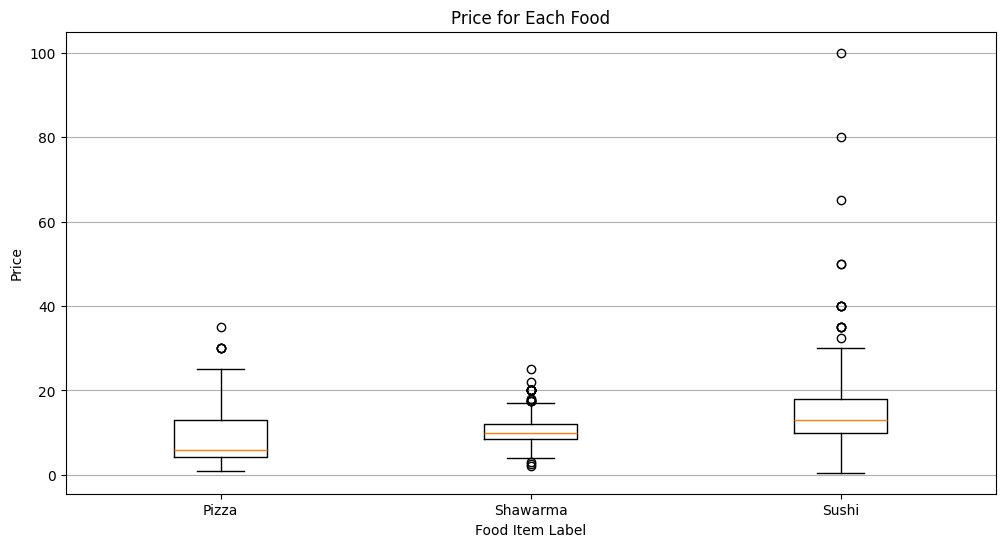

In [54]:
plot_numerical_feature_vs_label(df, "price_numeric", "Price")

# Display plot
plt.show()

In [55]:
print(df[df['price_numeric'] <= 3])

          id  \
3     606874   
6     606929   
8     644623   
18    516975   
21    521125   
...      ...   
1608  631711   
1609  606010   
1615  741592   
1637  632117   
1642  630128   

      Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)  \
3                                                     4                                                                       
6                                                     3                                                                       
8                                                     3                                                                       
18                                                    2                                                                       
21                                                    4                                                                       
...                                          

## Part 3.Categorical Features

Ordinal feature: Hot Sauce

In [64]:
print(df['Q8: How much hot sauce would you add to this food item?'].unique())

['A little (mild)' nan 'A moderate amount (medium)'
 'I will have some of this food item with my hot sauce' 'A lot (hot)']


In [85]:
# A clear order was shown between responses other than 'I will have some of this food item with my
# hot sauce', this response was sent to -1
hot_sauce_order = {
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'I will have some of this food item with my hot sauce': -1,
    'A lot (hot)': 3
}



df['hot_sauce_numeric'] = df['Q8: How much hot sauce would you add to this food item?'].map(hot_sauce_order)
df['hot_sauce_numeric'] = df['hot_sauce_numeric'].fillna(0)

print(df[['Q8: How much hot sauce would you add to this food item?', 'hot_sauce_numeric']].head(10))


  Q8: How much hot sauce would you add to this food item?  hot_sauce_numeric
0                                    A little (mild)                     1.0
1                                                NaN                     0.0
2                         A moderate amount (medium)                     2.0
3  I will have some of this food item with my hot...                    -1.0
4                                    A little (mild)                     1.0
5                                                NaN                     0.0
6                                                NaN                     0.0
7                         A moderate amount (medium)                     2.0
8                                                NaN                     0.0
9                                        A lot (hot)                     3.0


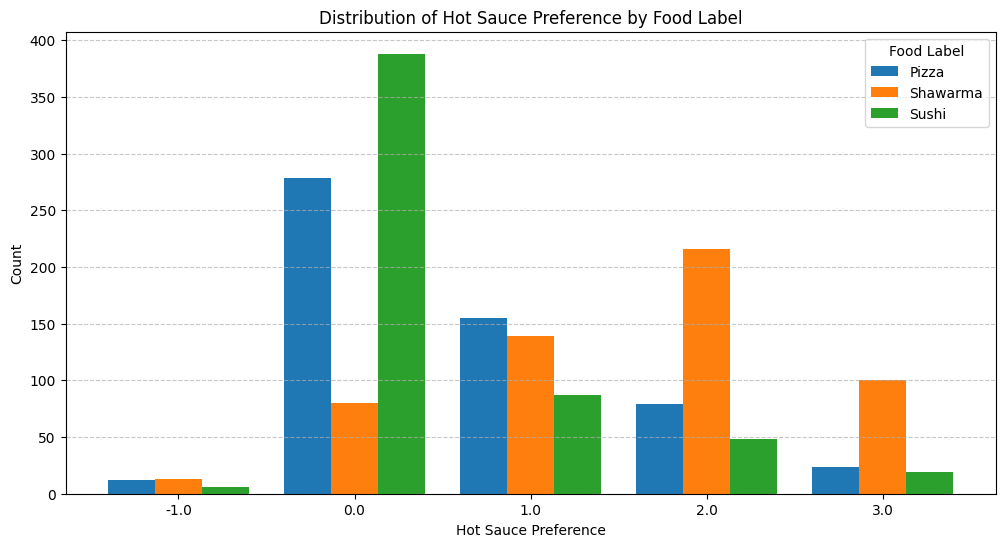

In [104]:


#
def plot_categorical_feature_by_label(df, feature_key, feature_name):
    labels = df['Label'].unique()
    labels.sort()

    # Define bins based on unique values
    unique_values = sorted(df[feature_key].dropna().unique())
    bar_width = 0.8 / len(labels)  # width of each bar

    x = np.arange(len(unique_values))  # x positions for bars

    plt.figure(figsize=(12, 6))

    for i, label in enumerate(labels):
        subset = df[df['Label'] == label]
        counts = subset[feature_key].value_counts().reindex(unique_values, fill_value=0)
        plt.bar(x + i * bar_width, counts, width=bar_width, label=str(label))



    plt.title(f'Distribution of {feature_name} by Food Label')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.xticks(x + bar_width * (len(labels)-1) / 2, unique_values)
    plt.legend(title='Food Label')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def plot_categorical_distribution_by_label(df, feature_key, feature_name):
    labels = df['Label'].unique()
    labels.sort()

    # Extract unique categories from the column (splitting multi-response answers)
    all_responses = df[feature_key].dropna().tolist()
    unique_values = sorted(set(item.strip() for response in all_responses for item in response.split(',')))

    bar_width = 0.8 / len(labels)  # width of each bar
    x = np.arange(len(unique_values))  # x positions for bars

    plt.figure(figsize=(12, 6))

    for i, label in enumerate(labels):
        subset = df[df['Label'] == label]
        split_responses = [item.strip() for response in subset[feature_key].dropna() for item in response.split(',')]
        response_counts = Counter(split_responses)
        sorted_values = [response_counts.get(value, 0) for value in unique_values]

        plt.bar(x + i * bar_width, sorted_values, width=bar_width, label=str(label))

    plt.title(f'Distribution of {feature_name} by Food Label')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.xticks(x + bar_width * (len(labels)-1) / 2, unique_values, rotation=10, ha="right")
    plt.legend(title='Food Label')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_categorical_feature_by_label(df, 'hot_sauce_numeric', 'Hot Sauce Preference')


In [105]:

def get_all_option_answered(column):

    # Drop NaN values and split each response by comma, then flatten into a single list
    unique_values = set()
    df[column].dropna().apply(lambda x: unique_values.update([val.strip() for val in x.split(',')]))
    return unique_values
# Display all unique values
unique_q3_values = get_all_option_answered("Q3: In what setting would you expect this food to be served? Please check all that apply")
print(f"Unique settings for Q3:\n{unique_q3_values}")

unique_q7_values = get_all_option_answered("Q7: When you think about this food item, who does it remind you of?")
print(f"Unique settings for Q7:\n{unique_q7_values}")

Unique settings for Q3:
{'Week day dinner', 'Week day lunch', 'Weekend lunch', 'Weekend dinner', 'Late night snack', 'At a party'}
Unique settings for Q7:
{'Friends', 'Teachers', 'Strangers', 'Parents', 'Siblings'}


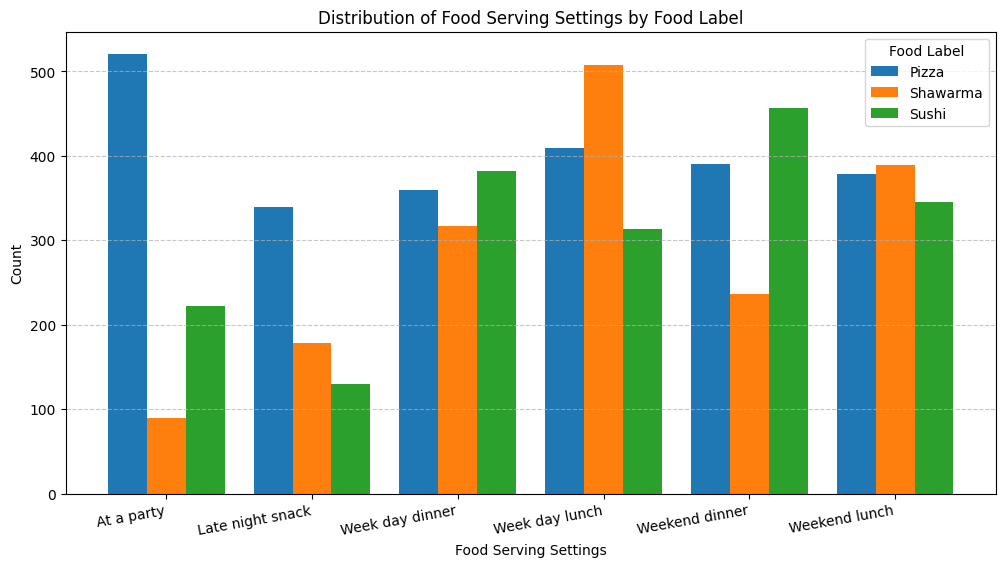

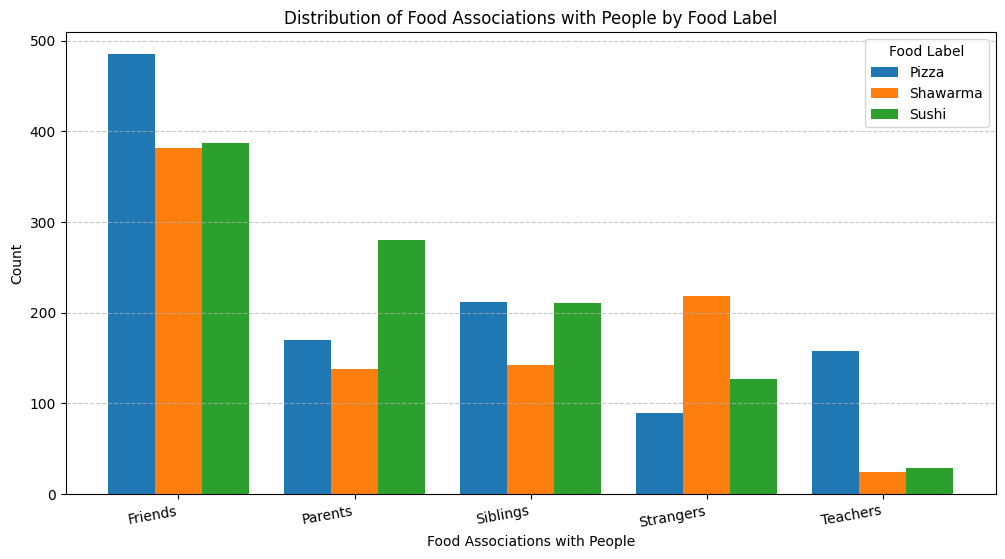

In [106]:


plot_categorical_distribution_by_label(df, "Q3: In what setting would you expect this food to be served? Please check all that apply", "Food Serving Settings")
plot_categorical_distribution_by_label(df, "Q7: When you think about this food item, who does it remind you of?", "Food Associations with People")




## Part 4.Text Features

In [114]:

def extract_vocab(df, column):
    vocab_set = set()
    for responses in df[column].dropna():
        words = responses.split(',')  # Split by comma
        vocab_set.update([w.strip() for w in words])
    return list(vocab_set)


vocab_q5 = extract_vocab(df, "Q5: What movie do you think of when thinking of this food item?")
vocab_q6 = extract_vocab(df, "Q6: What drink would you pair with this food item?")

# Print vocabulary sizes
print(f"Vocabulary Size for Q5: {len(vocab_q5)}")
print(f"Vocabulary Size for Q6: {len(vocab_q6)}")


Vocabulary Size for Q5: 808
Vocabulary Size for Q6: 434


In [113]:
import pandas as pd
import csv
from collections import Counter

# Function to extract vocabulary of movies
def extract_movie_vocab(df, column):
    vocab_set = set()
    for responses in df[column].dropna():
        words = responses.split(' ')  # Split by space
        vocab_set.update([w.strip().lower() for w in words])
    return list(vocab_set)

# Extract vocabulary for Q5 (Movies)
vocab_q5 = extract_movie_vocab(df, "Q5: What movie do you think of when thinking of this food item?")

print(f"Vocabulary Size for Q5 (Movies): {len(vocab_q5)}")
print("List of Movies:", vocab_q5)


Vocabulary Size for Q5 (Movies): 1187
List of Movies: ['pulp', 'tokyo', 'everywhere', 'it', 'english', 'translation', 'player', 'lord', 'aquaman', 'where', 'comedy', 'shawarma.', '(with', 'you', 'eternal', 'shrek', 'alone', 'barbie', 'angels', 'meg', "hands'", 'guess', 'rush', 'son', 'there', 'endgame', '&', 'serve', 'pie', 'running', 'rick', 'almost', '"star', 'shinchan', 'grandpa', 'western', 'land', 'italy', 'stark', 'za', 'anything.', 'movies)', 'blue', 'watched', 'mia', 'geisha', 'cannot', 'bit', 'dora', 'no,', 'gilmore', 'individuals', 'relaxing,', 'python', 'kids', 'cars', 'breakaway', 'related', 'futurama:', 'silence', 'morty', 'cheese', 'will', 'order', 'yakuza', 'italian', 'games', 't,', 'due', 'cooks', 'lucy', 'teen', 'thing', 'express,', '10', '"naruto"', 'die', 'midnight', 'freddy’s', 'english\r\n**************', 'wars', 'white', 'house', 'horror', 'furious', 'rings:', 'service', 'of!', 'deewani', '(shawarmas', 'coraline', 'passengers(2016)', 'tobe', 'someone', 'mutant', '